<a href="https://colab.research.google.com/github/Inshalmunaf/Deep_Learning_Project1/blob/main/DeepLearning__Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cats-and-dogs-image-classification' dataset.
Path to dataset files: /kaggle/input/cats-and-dogs-image-classification


In [2]:
import os
import pandas as pd
import numpy as np
import cv2

In [3]:
Test_path = os.path.join(path,'test')
Train_path = os.path.join(path,'train')


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D , MaxPool2D ,Dense, Flatten , BatchNormalization , Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = Train_path,
    labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = Test_path,
    labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [6]:
#Normalize
def process(image , label):
  image = tf.cast(image/255 , tf.float32)
  return image,label

test_ds = test_ds.map(process)
train_ds = train_ds.map(process)


In [7]:
# Model Building
model = Sequential()

model.add(Conv2D( 32 ,kernel_size=(3,3) , padding= 'valid' , activation = 'relu' , input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2) , padding='valid' , strides = 2))

model.add(Conv2D( 64 ,kernel_size=(3,3) , padding= 'valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2) , padding='valid' , strides = 2))

model.add(Conv2D( 128 ,kernel_size=(3,3) , padding= 'valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2) , padding='valid' , strides = 2))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1 , activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [10]:
history = model.fit(train_ds , epochs= 10  , validation_data = test_ds)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 653ms/step - accuracy: 0.5481 - loss: 8.9120 - val_accuracy: 0.5000 - val_loss: 3.9202
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.5055 - loss: 16.1559 - val_accuracy: 0.5000 - val_loss: 3.3048
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.6064 - loss: 9.9278 - val_accuracy: 0.4929 - val_loss: 1.9168
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.5849 - loss: 8.0588 - val_accuracy: 0.5214 - val_loss: 1.7674
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.5462 - loss: 5.8191 - val_accuracy: 0.5000 - val_loss: 3.9044
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.5952 - loss: 5.6387 - val_accuracy: 0.5000 - val_loss: 4.5803
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.5459 - loss: 4.1400 - val_accuracy: 0.5000 - val_loss: 4.8737
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.5415 - loss: 3.5485 - val_accuracy: 

In [11]:
import matplotlib.pyplot as plt

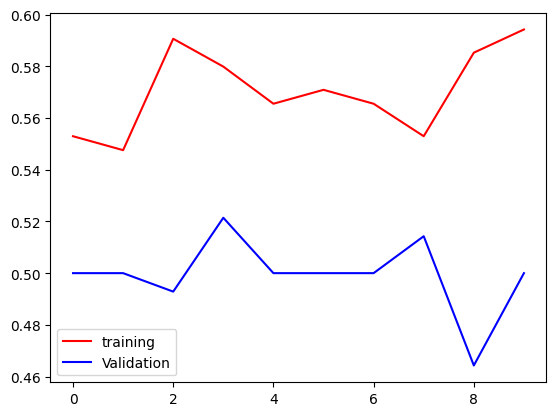

In [12]:
plt.plot(history.history['accuracy'] , color = 'red' ,label = 'training')
plt.plot(history.history['val_accuracy'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()

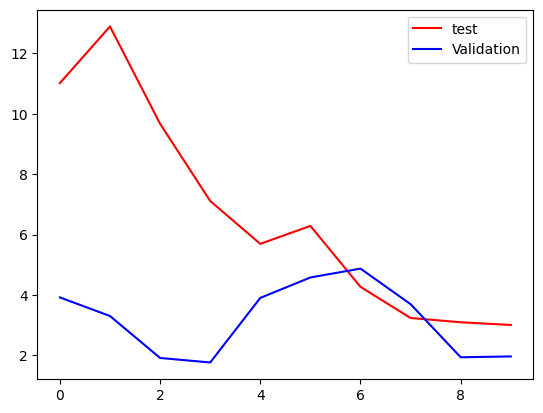

In [13]:
plt.plot(history.history['loss'] , color = 'red' ,label = 'test')
plt.plot(history.history['val_loss'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()

# **Using Pre Trained Model (VGG16)**

In [14]:
from tensorflow.keras.applications import VGG16
# Loading the pretrained model (VGG16)
base_model = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (256,256,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Basic Transfer Learning (VGG16) | Dropout & Augmentation Added | **Part A**

In [15]:
# Freezing the base model
base_model.trainable = False

In [16]:
from tensorflow.keras.layers import RandomFlip , RandomRotation ,RandomZoom

In [17]:
# CReating Own Classifier
model_assembled = Sequential([
    # Data Augmentation
    RandomFlip('horizontal', input_shape=(256,256,3)),
    RandomRotation(0.1),
    RandomZoom(0.1),

    base_model,
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model_assembled.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,909,249 (72.13 MB)

 Trainable params: 4,194,561 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
from tensorflow.keras.optimizers import Adam
#Compilation of model
model_assembled.compile(
    optimizer= Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [20]:
#Model Building
historyV2 = model_assembled.fit(
    train_ds,
    validation_data=test_ds,
    epochs =10
    )

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 439ms/step - accuracy: 0.4912 - loss: 3.0465 - val_accuracy: 0.5143 - val_loss: 0.7218
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - accuracy: 0.5362 - loss: 0.6990 - val_accuracy: 0.6500 - val_loss: 0.6372
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy: 0.5756 - loss: 0.6447 - val_accuracy: 0.5000 - val_loss: 0.6963
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - accuracy: 0.6554 - loss: 0.6135 - val_accuracy: 0.7786 - val_loss: 0.5489
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - accuracy: 0.6650 - loss: 0.5549 - val_accuracy: 0.8143 - val_loss: 0.5071
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - accuracy: 0.6945 - loss: 0.4851 - val_accuracy: 0.7857 - val_loss: 0.4772
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - accuracy: 0.7650 - loss: 0.4555 - val_accuracy: 0.8214 - val_loss: 0.4439
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - accuracy: 0.8229 - loss: 0.4236 - val_accuracy: 0

# Fine Tuning the model(VGG16) | Building pon Part A's model |  **Part B**

In [21]:
# Freezing the base model
base_model.trainable = True

In [22]:
for x in base_model.layers:
  print(x)

<InputLayer name=input_layer_1, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [23]:
#Freezing all layers excet last block(High Level features ) : Block 5
for x in base_model.layers[:-4]:
  x.trainable = False

In [24]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [25]:
model_assembled.compile(
    optimizer = Adam(learning_rate = 1e-5),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [26]:
model_assembled.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,909,249 (72.13 MB)

 Trainable params: 11,273,985 (43.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [27]:
print("Starting to fine tune")
history_fine_tune= model_assembled.fit (
    train_ds,
    validation_data = test_ds,
    epochs= 15,

)

Starting to fine tune
Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.8108 - loss: 0.4084 - val_accuracy: 0.8286 - val_loss: 0.4081
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 230ms/step - accuracy: 0.8477 - loss: 0.3864 - val_accuracy: 0.8429 - val_loss: 0.3827
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 266ms/step - accuracy: 0.8575 - loss: 0.3541 - val_accuracy: 0.8429 - val_loss: 0.3662
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.8754 - loss: 0.3224 - val_accuracy: 0.8500 - val_loss: 0.3480
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step - accuracy: 0.8666 - loss: 0.3309 - val_accuracy: 0.8571 - val_loss: 0.3397
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 234ms/step - accuracy: 0.8943 - loss: 0.3090 - val_accuracy: 0.8429 - val_loss: 0.3254
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step - accuracy: 0.9128 - loss: 0.3102 - val_accuracy: 0.8571 - val_loss: 0.3347
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 276ms/step - accuracy: 0.9062 - loss: 0.2

# Graph Plotting Overfitting Checks

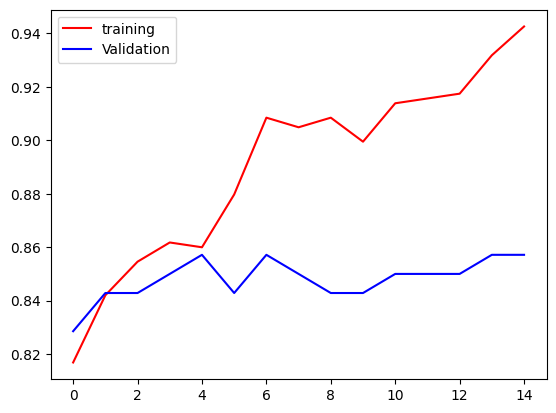

In [28]:
plt.plot(history_fine_tune.history['accuracy'] , color = 'red' ,label = 'training')
plt.plot(history_fine_tune.history['val_accuracy'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()

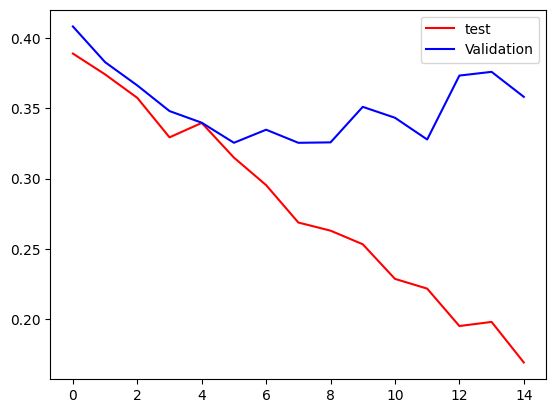

In [29]:
plt.plot(history_fine_tune.history['loss'] , color = 'red' ,label = 'test')
plt.plot(history_fine_tune.history['val_loss'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()